### Computational Guided Inquiry for PChem (Neshyba, 2022)

## Freezing point depression

### Key equations

The units of molality, $b$, are moles (of solute B) divided by kg (of solvent, like water). You can convert from molality to mole fraction using
$$
\chi_{H_2O} = \frac 1 {1+M_{H_2O} b_B} \ \ \ (1)
$$

where we've added subscripts to remind ourselves that ${H_2O}$ is the solvent and B is a solute. Applying Raoult's Law to a solution consists of computing a new pressure, 

$$
P_{H_2O}=\chi_{H_2O} \times P_{H_2O}^* \ \ \ (2)
$$

which of course will be smaller than $P_{H_2O}^*$ because $\chi_{H_2O} < 1$. Linearization of the governing equations (a phrase that buries a lot of theory!) leads to the approximation 

$$
\Delta T_F = K_A \times b \ \ \ (3) $$ 

where $K_A$ is the solvent's *cryoscopic constant* -- see, e.g., https://en.wikipedia.org/wiki/List_of_boiling_and_freezing_information_of_solvents.

In [1]:
# Import resources 
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

In [3]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

# Enthalpy of vap and sub
DHvap = AssignQuantity(44,'kJ/mol')
DHsub = AssignQuantity(50,'kJ/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Define an extended (supercooled or superheated) Clausius-Clapeyron function
The function below is provided for you and can be run as-is. But if you want to see a different amount of superheating or cooling in your graphs below, you can alter the first few lines to suit you.

In [8]:
def Clausius_Clapeyron_super(T,T3,P3,DH,R,AssignQuantity):
    """ This function calculates Clausius-Clapeyron curves past the triple point"""
    
    # The numbers here determine how much superheating or supercooling we want to see
    superheat = AssignQuantity(5,'K')
    supercool = AssignQuantity(5,'K')

    # Decide on whether we're superheating or supercooling, and extend appropriately
    if T < T3:
        print('Supercooling ...')
        T_array = AssignQuantity(np.linspace(T,T3+superheat),T.units)
    else:
        print('Superheating ...')
        T_array = AssignQuantity(np.linspace(T3-supercool,T),T.units)
    R.ito('J/mol/K')
    DH.ito('J/mol')
    P_array = P3*np.exp(-DH/R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)

    # Return the temperature and pressure arrays
    return T_array, P_array

### Using the extended Clausius-Clapeyron equation
The first line below uses Clausius_Clapeyron_super to calculate $P_{H_2O,liq}^*$ *up* to 278 K. The temperature range starts a few degrees below $T_3$, because this is *super* Clausius-Clapeyron! 

Add another line that uses Clausius_Clapeyron_super to calculate $P_{H_2O,ice}^*$ *down* to 268 K. You can call the resulting arrays T_sv and P_sv, if you like.

In [9]:
# Call Clausius_Clapeyron for the liquid->vapor phase boundary, going up to 278 K.
T_lv, P_lv = Clausius_Clapeyron_super(AssignQuantity(278,'K'),T3,P3,DHvap,R,AssignQuantity)

# Call Clausius_Clapeyron for the solid->vapor phase boundary, going down to 268 K.
### BEGIN SOLUTION
T_sv, P_sv = Clausius_Clapeyron_super(AssignQuantity(268,'K'),T3,P3,DHsub,R,AssignQuantity)
### END SOLUTION

Superheating ...
Units of resulting temperature: kelvin
Units of resulting pressure: pascal
Supercooling! ...
Units of resulting temperature: kelvin
Units of resulting pressure: pascal


### Plotting the results
Plot these two pressures ($P_{H_2O,liq}^*$ and $P_{H_2O,ice}^*$), with appropriate legends. Our coloring convention is green for liquid->vapor, orange for solid->vapor. 

<IPython.core.display.Javascript object>


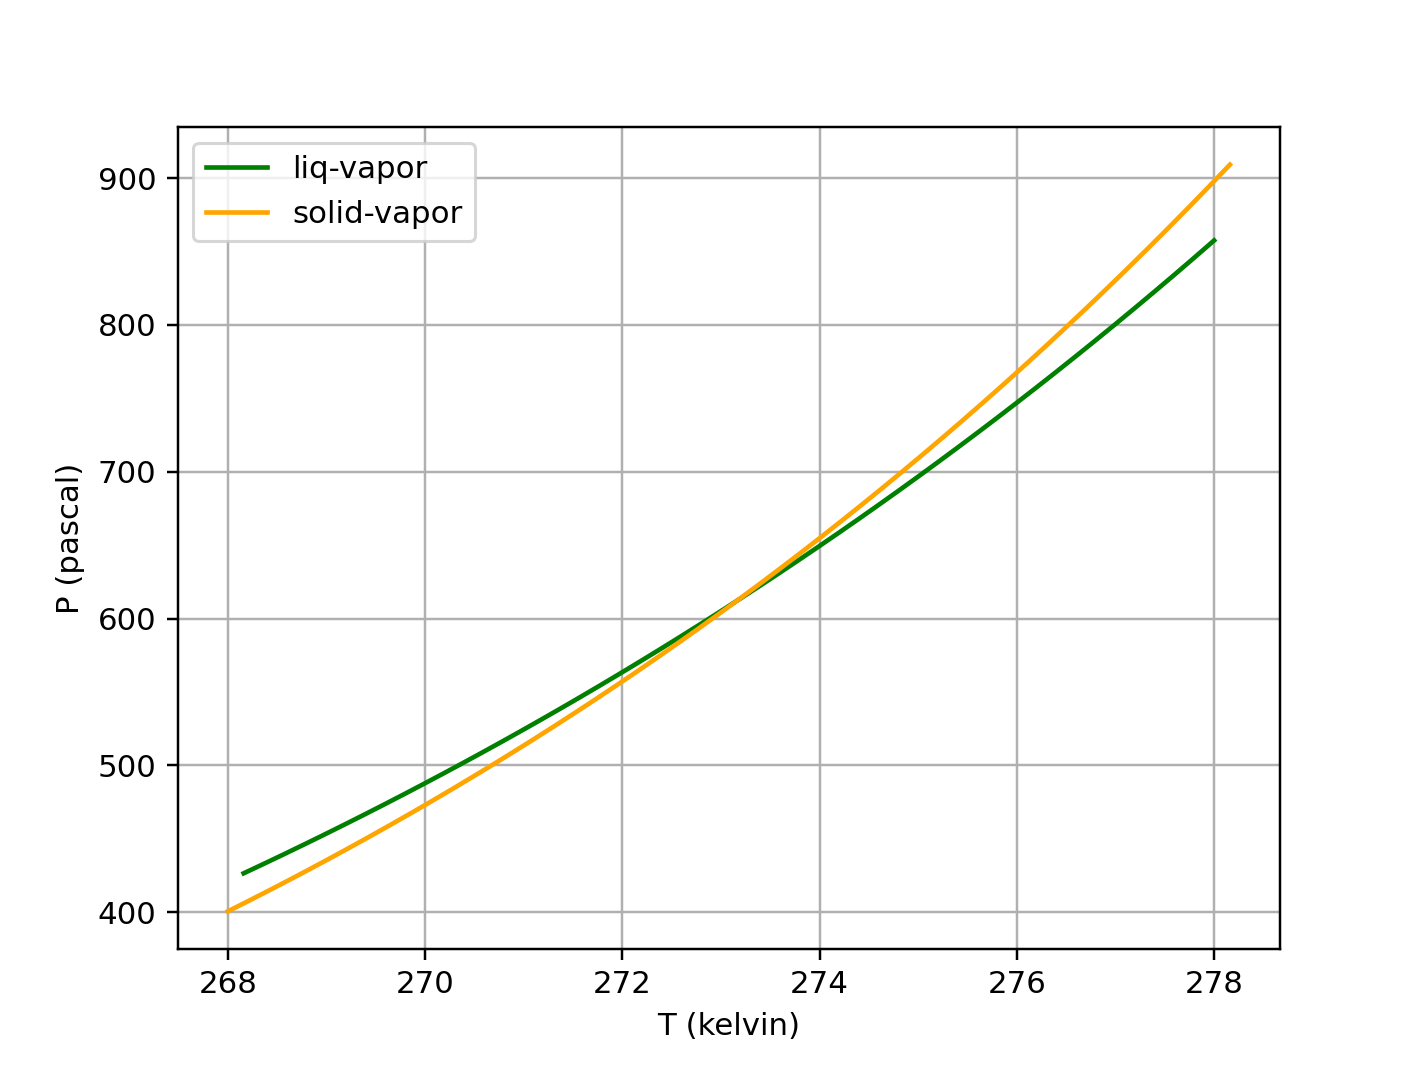

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [6]:
# Plot the solid->vapor, liquid->vapor phase boundaries
### BEGIN SOLUTION
plt.figure()
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()
### END SOLUTION

### Pause for analysis
Using the zoom feature, double-check that the intersection really does occur at water's triple point, $T_3=273.16 \ K$ and $P_3 = 612 \ Pa$. 

### Applying Raoult's Law to the liquid->vapor pressure

In the cell below, you'll examine the consequences of using a solute molality of $0.5 \ mol/kg$, when the solvent is water. First, you'll calculate the mole fraction of *water* in that solution, using Eq. (1). 

Once you have $\chi_{H_2O}$, plot the pressure of the two phase boundaries you got previously, but add on the Raoult-corrected pressure too, with appropriate legends. Use a dashed line for the Raoult result, something like

    plt.plot(T_lv,P_lv*chiH2O,color='green',label='liq-vapor',linestyle='dashed')


0.9910802775024778 dimensionless


<IPython.core.display.Javascript object>


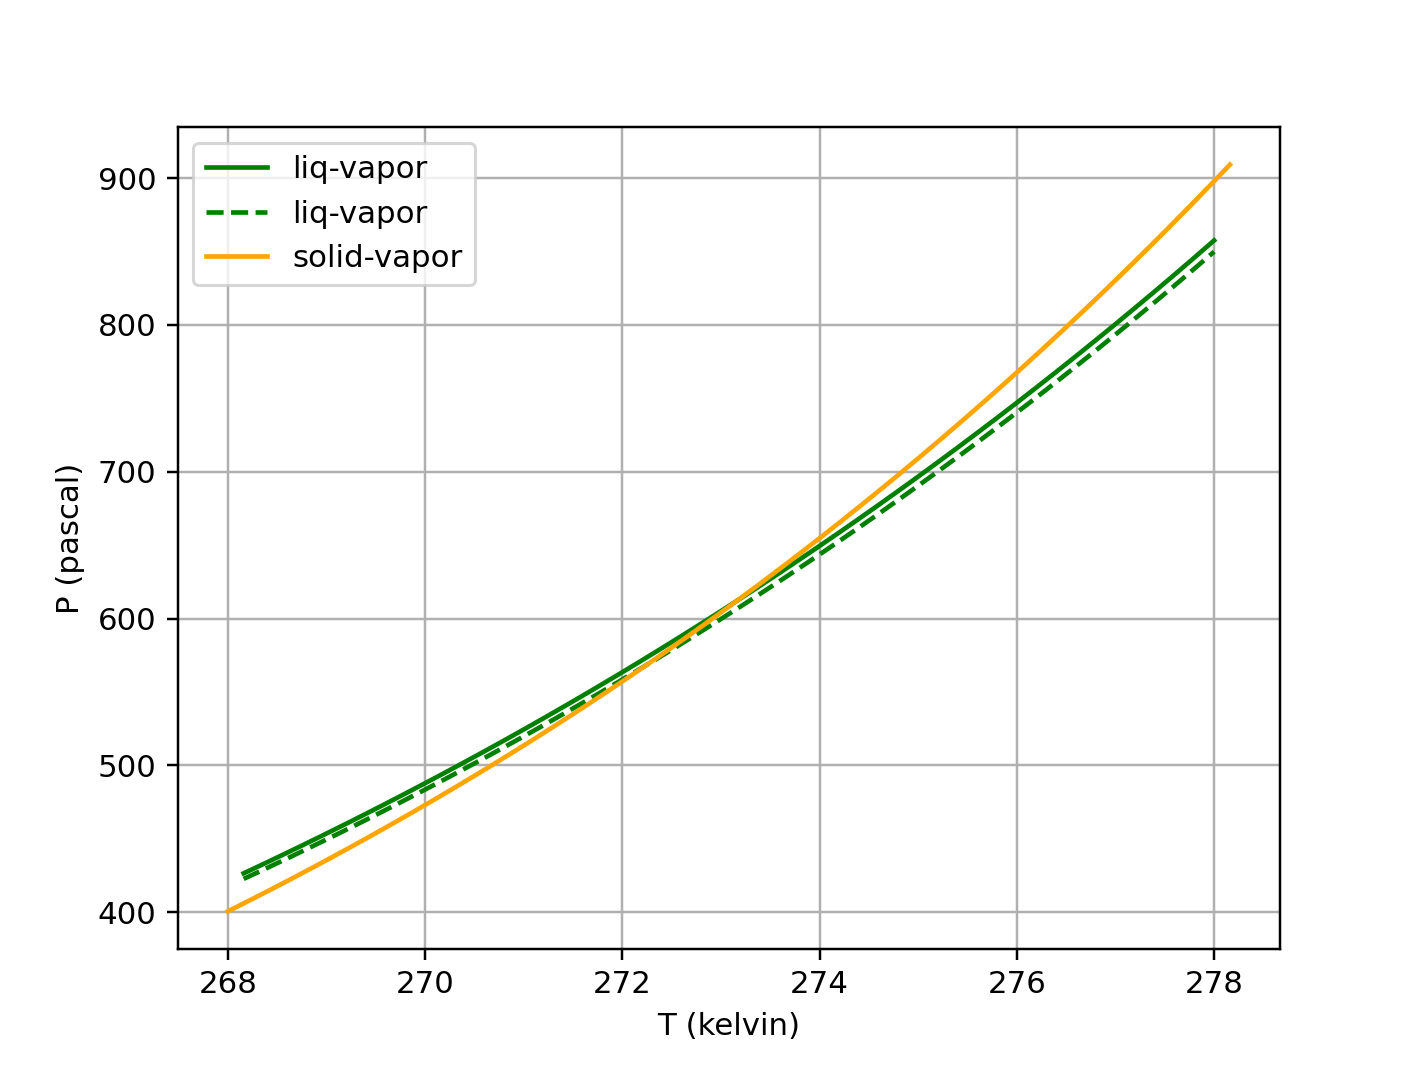

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
# Assign a value of 0.5 mol/kg to b, and use it to calculate the mole fraction of water in this solution 
### BEGIN SOLUTION
b = AssignQuantity(0.5,'mol/kg')
chiH2O = 1/(1+M*b); print(chiH2O)
### END SOLUTION

# Plot the solid->vapor, liquid->vapor, and Raoult-corrected liquid-> vapor phase boundaries
### BEGIN SOLUTION
plt.figure()
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_lv,P_lv*chiH2O,color='green',label='liq-vapor',linestyle='dashed')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()
### END SOLUTION

### Pause for analysis
Using the zoom feature, figure out the new freezing temperature, and record your results in spreadsheet. Then run the whole notebook again a few more times, with increasing concentrations of solute b, and record your results. You probably don't want to get much above $b_B=2 {\ mol \over kg}$, or else you'll have to expand the limits of your graph. Once you're happy with your data set, use a trendline analysis in your spreadsheet to get the slope; see Eq. (3) in the Introduction.

One you've done all that, in the cell below, 

1. Report the value of $K_A$ you get, with appropriate units. 
1. Do a little web-surfing to find an experimental value (and include the link). Your value should line up fairly well, but if it's not perfect, remember that we made some assumptions getting here. 

### BEGIN SOLUTION
### END SOLUTION

### Refresh/save/validate/close/submit/logout